# COGS 108 FINAL PROJECT

This notebook will explore the salary of SF workers in the government sector, and help us understand how these salaries have grown relative to each other, as well as relative to COA, inflation, and general economic growth.

This dataset will come from the years of 2011 - 2014, and will reflect the years post economic downturn from the 2008 recession.

In [1]:
import pandas as pd
import seaborn
import matplotlib as mpl
import numpy as np
import re
import matplotlib.pyplot as plt

We'll need to import the data collected from these Government-related jobs from 2011 - 2014 from the Dataset from Kaggle.

In [2]:
salary_df = pd.read_csv("Salaries.csv", dtype={'JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})

/Users/amyyee/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Load additional years of data
salary_2015 = pd.read_csv("san-francisco-2015.csv", dtype={'JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
salary_2015 = salary_2015.drop(columns=['EmployeeName'])
salary_2015['JobTitle'] = salary_2015['JobTitle'].str.upper()

salary_2016 = pd.read_csv("san-francisco-2016.csv", dtype={'JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
salary_2016 = salary_2016.drop(columns=['EmployeeName'])
salary_2016['JobTitle'] = salary_2016['JobTitle'].str.upper()

salary_2017 = pd.read_csv("san-francisco-2017.csv", dtype={'JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
salary_2017 = salary_2017.drop(columns=['EmployeeName'])
salary_2017['JobTitle'] = salary_2017['JobTitle'].str.upper()

We'll also want to clean up this data in regards to safe harbor; this will require us to remove the name of the employee, as well as the agency of each person; conviently, all agencies are in San Francisco, as it is the area we are taking a look at.

In [4]:
salary_df = salary_df.drop(columns=['EmployeeName'])

In [5]:
#print(salary_df.loc[10])

In [6]:
print(salary_df['JobTitle'].value_counts())
salary_df['JobTitle'].unique()

Transit Operator                                      7036
Special Nurse                                         4389
Registered Nurse                                      3736
Public Svc Aide-Public Works                          2518
Police Officer 3                                      2421
Custodian                                             2418
TRANSIT OPERATOR                                      2388
Firefighter                                           2359
Recreation Leader                                     1971
Patient Care Assistant                                1945
Deputy Sheriff                                        1933
Police Officer                                        1476
SPECIAL NURSE                                         1402
Public Service Trainee                                1328
REGISTERED NURSE                                      1219
Police Officer 2                                      1141
Attorney (Civil/Criminal)                             11

array(['GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY',
       'CAPTAIN III (POLICE DEPARTMENT)',
       'WIRE ROPE CABLE MAINTENANCE MECHANIC', ..., 'Conversion',
       'Cashier 3', 'Not provided'], dtype=object)

Lets try to even out the data by stripping out anything within parenthesis to clear up and duplicates

In [7]:
salary_df['JobTitle'] = salary_df['JobTitle'].str.upper()
print(salary_df['Year'])
#salary_df
#salary_df['JobTitle'].value_counts()

0         2011
1         2011
2         2011
3         2011
4         2011
5         2011
6         2011
7         2011
8         2011
9         2011
10        2011
11        2011
12        2011
13        2011
14        2011
15        2011
16        2011
17        2011
18        2011
19        2011
20        2011
21        2011
22        2011
23        2011
24        2011
25        2011
26        2011
27        2011
28        2011
29        2011
          ... 
148624    2014
148625    2014
148626    2014
148627    2014
148628    2014
148629    2014
148630    2014
148631    2014
148632    2014
148633    2014
148634    2014
148635    2014
148636    2014
148637    2014
148638    2014
148639    2014
148640    2014
148641    2014
148642    2014
148643    2014
148644    2014
148645    2014
148646    2014
148647    2014
148648    2014
148649    2014
148650    2014
148651    2014
148652    2014
148653    2014
Name: Year, Length: 148654, dtype: int64


In [8]:
#Seperate Dataframes into yearly parts (2011, 2012, 2013, 2014)
salary_2011 = salary_df[salary_df['Year'] == 2011]
salary_2012 = salary_df[salary_df['Year'] == 2012]
salary_2013 = salary_df[salary_df['Year'] == 2013]
salary_2014 = salary_df[salary_df['Year'] == 2014]


In [9]:
#print(salary_2011[salary_2011['JobTitle'] == "CLERK"].index)

Lets drop any counts where the job count is below 30, for clarity's sake.

In [10]:
# Find any Job titles and drop them if they are less <30
salary_2011 = salary_2011.groupby('JobTitle').filter(lambda x: len(x) > 30)
salary_2012 = salary_2012.groupby('JobTitle').filter(lambda x: len(x) > 30)
salary_2013 = salary_2013.groupby('JobTitle').filter(lambda x: len(x) > 30)
salary_2014 = salary_2014.groupby('JobTitle').filter(lambda x: len(x) > 30)
salary_2015 = salary_2015.groupby('JobTitle').filter(lambda x: len(x) > 30)
salary_2016 = salary_2016.groupby('JobTitle').filter(lambda x: len(x) > 30)
salary_2017 = salary_2017.groupby('JobTitle').filter(lambda x: len(x) > 30)


In [11]:
#salary_2011["JobTitle"].value_counts().index.tolist()
#print("POLICE" in "POLICE OFFICER")

We'll go ahead and now sort the thousands of jobs into a few catagories to make viewing and calculations easier

In [12]:
def find_job_title(row):
    
    police_title = ['police', 'sherif', 'probation', 'sergeant', 'officer', 'lieutenant']
    fire_title = ['fire']
    transit_title = ['mta', 'transit']
    medical_title = ['anesth', 'medical', 'nurs', 'health', 'physician', 'orthopedic', 'pharm', 'care']
    court_title = ['court', 'legal']
    automotive_title = ['automotive', 'mechanic', 'truck']
    engineer_title = ['engineer', 'engr', 'eng', 'program']
    general_laborer_title = ['general laborer', 'painter', 'inspector', 'carpenter', 'electrician', 'plumber', 'maintenance']
    aide_title = ['aide', 'assistant', 'secretary', 'attendant']
    
    for title in police_title:
        if title in row.lower():
            return 'police'    
    for title in fire_title:
        if title in row.lower():
            return 'fire'
    for title in aide_title:
        if title in row.lower():
            return 'assistant'
    for title in transit_title:
        if title in row.lower():
            return 'transit'
    for title in medical_title:
        if title in row.lower():
            return 'medical'
    if 'airport' in row.lower():
        return 'airport'
    if 'worker' in row.lower():
        return 'social worker'
    if 'architect' in row.lower():
        return 'architect'
    for title in court_title:
        if title in row.lower():
            return 'court'
    if 'major' in row.lower():
        return 'mayor'
    if 'librar' in row.lower():
        return 'library'
    if 'guard' in row.lower():
        return 'guard'
    if 'public' in row.lower():
        return 'public works'
    if 'attorney' in row.lower():
        return 'attorney'
    if 'custodian' in row.lower():
        return 'custodian'
    if 'account' in row.lower():
        return 'account'
    if 'garden' in row.lower():
        return 'gardener'
    if 'recreation' in row.lower():
        return 'recreation leader'
    for title in automotive_title:
        if title in row.lower():
            return 'automotive'
    for title in engineer_title:
        if title in row.lower():
            return 'engineer'
    for title in general_laborer_title:
        if title in row.lower():
            return 'general laborer'
    if 'food serv' in row.lower():
        return 'food service'
    if 'clerk' in row.lower():
        return 'clerk'
    if 'porter' in row.lower():
        return 'porter' 
    if 'analy' in row.lower():
        return 'analyst'
    if 'manager' in row.lower():
        return 'manager'
    else:
        return 'other'

salary_2011["Job_Group"]=salary_2011["JobTitle"].map(find_job_title)
salary_2012["Job_Group"]=salary_2012["JobTitle"].map(find_job_title)
salary_2013["Job_Group"]=salary_2013["JobTitle"].map(find_job_title)
salary_2014["Job_Group"]=salary_2014["JobTitle"].map(find_job_title)
salary_2015["Job_Group"]=salary_2015["JobTitle"].map(find_job_title)
salary_2016["Job_Group"]=salary_2016["JobTitle"].map(find_job_title)
salary_2017["Job_Group"]=salary_2017["JobTitle"].map(find_job_title)


Lets generate averages and new dataframes for the departmental data

In [13]:
jobgroups = salary_2017['Job_Group'].unique()
average_jobgroups2011 = [] 
average_jobgroups2012 = [] 
average_jobgroups2013 = [] 
average_jobgroups2014 = [] 
average_jobgroups2015 = [] 
average_jobgroups2016 = [] 
average_jobgroups2017 = [] 
for i in jobgroups: 
    average_jobgroups2011.append(salary_2011[salary_2011['Job_Group'] == i]['TotalPay'].mean())
    average_jobgroups2012.append(salary_2012[salary_2012['Job_Group'] == i]['TotalPay'].mean())
    average_jobgroups2013.append(salary_2013[salary_2013['Job_Group'] == i]['TotalPay'].mean())
    average_jobgroups2014.append(salary_2014[salary_2014['Job_Group'] == i]['TotalPay'].mean())
    average_jobgroups2015.append(salary_2015[salary_2015['Job_Group'] == i]['TotalPay'].mean())
    average_jobgroups2016.append(salary_2016[salary_2016['Job_Group'] == i]['TotalPay'].mean())
    average_jobgroups2017.append(salary_2017[salary_2017['Job_Group'] == i]['TotalPay'].mean())

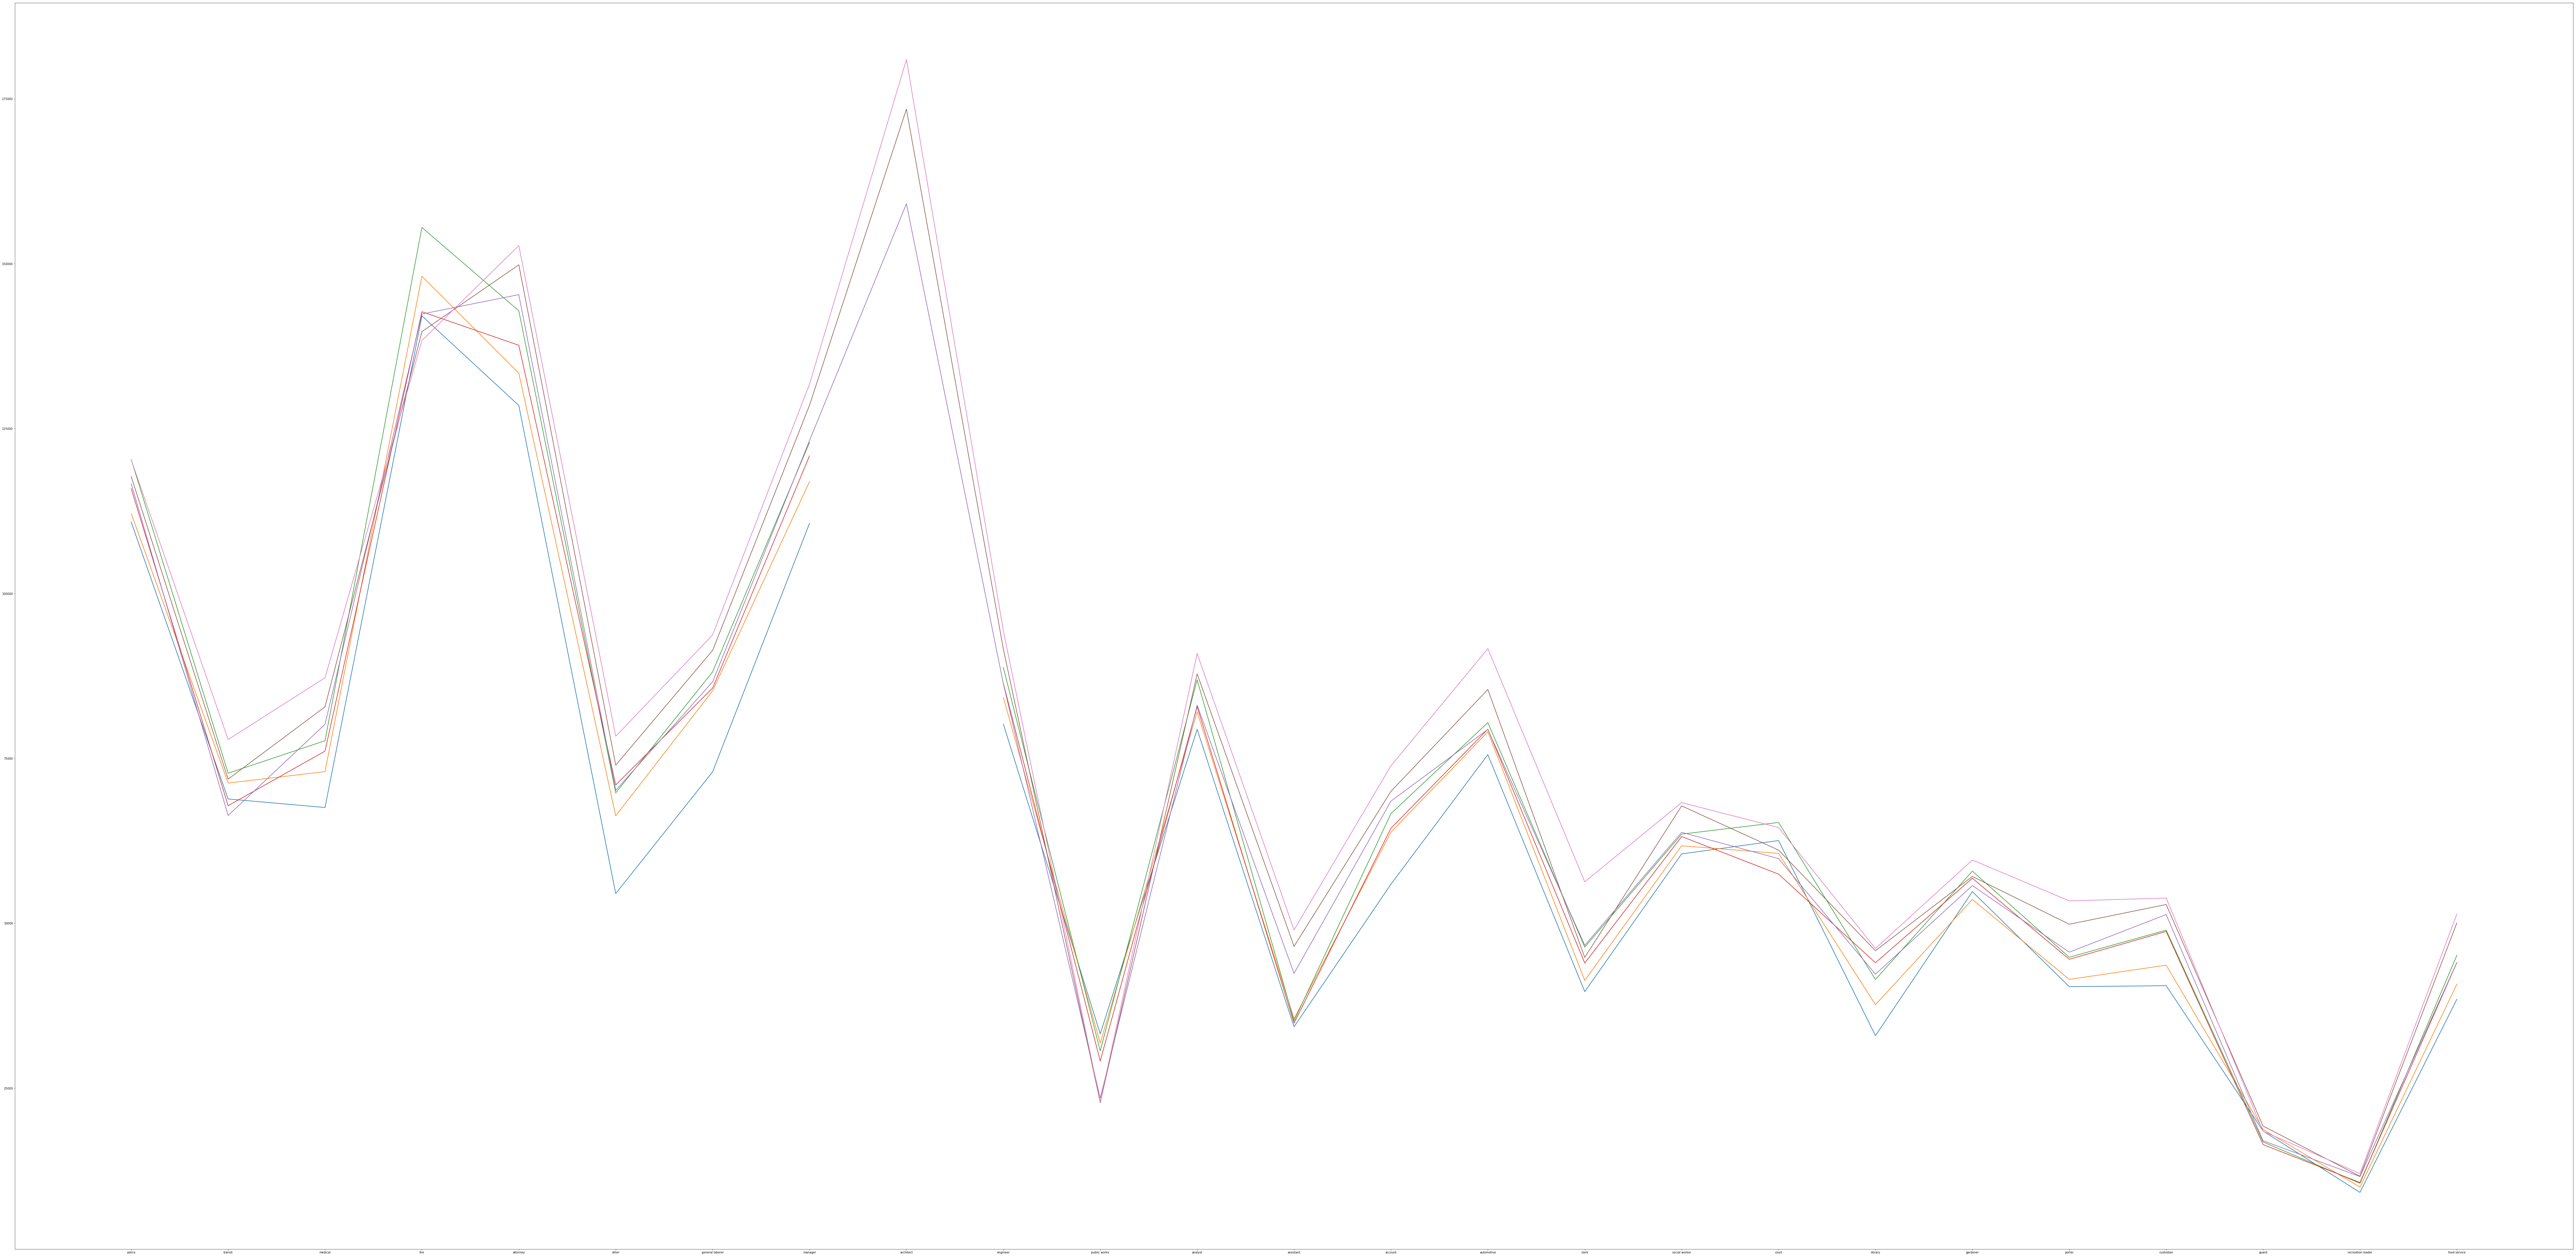

In [14]:
plt.figure(figsize=(160,80)) 
plt.plot(jobgroups, average_jobgroups2011, linewidth = 2.0)
plt.plot(jobgroups, average_jobgroups2012, linewidth = 2.0)
plt.plot(jobgroups, average_jobgroups2013, linewidth = 2.0)
plt.plot(jobgroups, average_jobgroups2014, linewidth = 2.0)
plt.plot(jobgroups, average_jobgroups2015, linewidth = 2.0)
plt.plot(jobgroups, average_jobgroups2016, linewidth = 2.0)
plt.plot(jobgroups, average_jobgroups2017, linewidth = 2.0)
plt.show()

We can compare these increases in pay in SF to the increases in pay in LA, and then use these values to compare to the effective rise in inflation, cost of living, and housing in these relative areas.

However, we will need to cleanup the LA data set first.

In [15]:
LA2011_salary_df = pd.read_csv("los-angeles-2011.csv", dtype={'EmployeeName':'object','JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
LA2011_salary_df = LA2011_salary_df.drop(columns=['EmployeeName'])
LA2011_salary_df['JobTitle'] = LA2011_salary_df['JobTitle'].str.upper()

LA2012_salary_df = pd.read_csv("los-angeles-2012.csv", dtype={'EmployeeName':'object','JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
LA2012_salary_df = LA2012_salary_df.drop(columns=['EmployeeName'])
LA2012_salary_df['JobTitle'] = LA2012_salary_df['JobTitle'].str.upper()

LA2013_salary_df = pd.read_csv("los-angeles-2013.csv", dtype={'EmployeeName':'object','JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
LA2013_salary_df = LA2013_salary_df.drop(columns=['EmployeeName'])
LA2013_salary_df['JobTitle'] = LA2013_salary_df['JobTitle'].str.upper()

LA2014_salary_df = pd.read_csv("los-angeles-2014.csv", dtype={'EmployeeName':'object','JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
LA2014_salary_df = LA2014_salary_df.drop(columns=['EmployeeName'])
LA2014_salary_df['JobTitle'] = LA2014_salary_df['JobTitle'].str.upper()

LA2015_salary_df = pd.read_csv("los-angeles-2015.csv", dtype={'EmployeeName':'object','JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
LA2015_salary_df = LA2015_salary_df.drop(columns=['EmployeeName'])
LA2015_salary_df['JobTitle'] = LA2015_salary_df['JobTitle'].str.upper()

LA2016_salary_df = pd.read_csv("los-angeles-2016.csv", dtype={'EmployeeName':'object','JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
LA2016_salary_df = LA2016_salary_df.drop(columns=['EmployeeName'])
LA2016_salary_df['JobTitle'] = LA2016_salary_df['JobTitle'].str.upper()

LA2017_salary_df = pd.read_csv("los-angeles-2017.csv", dtype={'EmployeeName':'object','JobTitle': 'object', "BasePay": 'object', "Overtime": 'object', 'Otherpay': 'object', 'Agency': 'object'})
LA2017_salary_df = LA2017_salary_df.drop(columns=['EmployeeName'])
LA2017_salary_df['JobTitle'] = LA2017_salary_df['JobTitle'].str.upper()

In [16]:
#Look at the prior SF cleanup for additional information regarding this code.
LA2011_salary_df = LA2011_salary_df.groupby('JobTitle').filter(lambda x: len(x) > 30)
LA2012_salary_df = LA2012_salary_df.groupby('JobTitle').filter(lambda x: len(x) > 30)
LA2013_salary_df = LA2013_salary_df.groupby('JobTitle').filter(lambda x: len(x) > 30)
LA2014_salary_df = LA2014_salary_df.groupby('JobTitle').filter(lambda x: len(x) > 30)
LA2015_salary_df = LA2015_salary_df.groupby('JobTitle').filter(lambda x: len(x) > 30)
LA2016_salary_df = LA2016_salary_df.groupby('JobTitle').filter(lambda x: len(x) > 30)
LA2017_salary_df = LA2017_salary_df.groupby('JobTitle').filter(lambda x: len(x) > 30)

In [17]:
#LA2012_salary_df["JobTitle"].value_counts().index.tolist()

In [18]:
#print(LAaverageOther2011, LAaverageOther2012)

CPI will help us understand inflation to compare the increase in wages relative to inflation and home price increases.

In [19]:
LAcpi_df = pd.read_csv("avgSFCPI.csv")
SFcpi_df = pd.read_csv("avgLACPI.csv")
#cpi_df = cpi_df.dropna()
#SFcpi_df

In [20]:
#turn sf cpi into percentages for inflation
sfCPI11 = ((SFcpi_df['AVERAGE BASKET'].iloc[1] - SFcpi_df['AVERAGE BASKET'].iloc[0]) / SFcpi_df['AVERAGE BASKET'].iloc[0]) * 100
sfCPI12 = ((SFcpi_df['AVERAGE BASKET'].iloc[2] - SFcpi_df['AVERAGE BASKET'].iloc[1]) / SFcpi_df['AVERAGE BASKET'].iloc[1]) * 100
sfCPI13 = ((SFcpi_df['AVERAGE BASKET'].iloc[3] - SFcpi_df['AVERAGE BASKET'].iloc[2]) / SFcpi_df['AVERAGE BASKET'].iloc[2]) * 100
sfCPI14 = ((SFcpi_df['AVERAGE BASKET'].iloc[4] - SFcpi_df['AVERAGE BASKET'].iloc[3]) / SFcpi_df['AVERAGE BASKET'].iloc[3]) * 100
sfCPI15 = ((SFcpi_df['AVERAGE BASKET'].iloc[4] - SFcpi_df['AVERAGE BASKET'].iloc[4]) / SFcpi_df['AVERAGE BASKET'].iloc[4]) * 100
sfCPI16 = ((SFcpi_df['AVERAGE BASKET'].iloc[5] - SFcpi_df['AVERAGE BASKET'].iloc[4]) / SFcpi_df['AVERAGE BASKET'].iloc[4]) * 100

SFcpi = [sfCPI11, sfCPI12, sfCPI13, sfCPI14, sfCPI15, sfCPI16]

In [21]:
#turn LA cpi into inflation %
laCPI11 = ((LAcpi_df['AVERAGE BASKET'].iloc[1] - LAcpi_df['AVERAGE BASKET'].iloc[0]) / LAcpi_df['AVERAGE BASKET'].iloc[0]) * 100
laCPI12 = ((LAcpi_df['AVERAGE BASKET'].iloc[2] - LAcpi_df['AVERAGE BASKET'].iloc[1]) / LAcpi_df['AVERAGE BASKET'].iloc[1]) * 100
laCPI13 = ((LAcpi_df['AVERAGE BASKET'].iloc[3] - LAcpi_df['AVERAGE BASKET'].iloc[2]) / LAcpi_df['AVERAGE BASKET'].iloc[2]) * 100
laCPI14 = ((LAcpi_df['AVERAGE BASKET'].iloc[4] - LAcpi_df['AVERAGE BASKET'].iloc[3]) / LAcpi_df['AVERAGE BASKET'].iloc[3]) * 100
laCPI15 = ((LAcpi_df['AVERAGE BASKET'].iloc[4] - LAcpi_df['AVERAGE BASKET'].iloc[4]) / LAcpi_df['AVERAGE BASKET'].iloc[4]) * 100
laCPI16 = ((LAcpi_df['AVERAGE BASKET'].iloc[5] - LAcpi_df['AVERAGE BASKET'].iloc[4]) / LAcpi_df['AVERAGE BASKET'].iloc[4]) * 100

LAcpi = [laCPI11, laCPI12, laCPI13, laCPI14, laCPI15, laCPI16]

In [22]:
medianHousing_df = pd.read_csv("medianHomes.csv", usecols=["Mon-Yr", "San Francisco", "Los Angeles"])
medianHousing_df = medianHousing_df.dropna()
medianHousing_df

#Strip '$ and ,' sign

medianHousing_df['San Francisco'] = medianHousing_df['San Francisco'].str.replace('$', '')
medianHousing_df['Los Angeles'] = medianHousing_df['Los Angeles'].str.replace('$', '')
medianHousing_df['San Francisco'] = medianHousing_df['San Francisco'].str.replace(',', '')
medianHousing_df['Los Angeles'] = medianHousing_df['Los Angeles'].str.replace(',', '')
medianHousing_df['Los Angeles'] = medianHousing_df['Los Angeles'].astype(int)
medianHousing_df['San Francisco'] = medianHousing_df['San Francisco'].astype(int)\

#print(medianHousing_df)

In [23]:
medianSF11, medianSF12, medianSF13, medianSF14, medianSF15, medianSF16, medianSF17, medianSF18 = (0,0,0,0,0,0,0,0)
medianLA11, medianLA12, medianLA13, medianLA14, medianLA15, medianLA16, medianLA17, medianLA18 = (0,0,0,0,0,0,0,0)

for i in range(0,96):
    if i in range(0,12):
        medianSF11 += medianHousing_df['San Francisco'].iloc[i]
        medianLA11 += medianHousing_df['Los Angeles'].iloc[i]
    if i in range(12,24):
        medianSF12 += medianHousing_df['San Francisco'].iloc[i]
        medianLA12 += medianHousing_df['Los Angeles'].iloc[i]
    if i in range(24,36):
        medianSF13 += medianHousing_df['San Francisco'].iloc[i]
        medianLA13 += medianHousing_df['Los Angeles'].iloc[i]
    if i in range(36,48):
        medianSF14 += medianHousing_df['San Francisco'].iloc[i]
        medianLA14 += medianHousing_df['Los Angeles'].iloc[i]
    if i in range(48,60):
        medianSF15 += medianHousing_df['San Francisco'].iloc[i]
        medianLA15 += medianHousing_df['Los Angeles'].iloc[i]
    if i in range(60,72):
        medianSF16 += medianHousing_df['San Francisco'].iloc[i]
        medianLA16 += medianHousing_df['Los Angeles'].iloc[i]
    if i in range(72,84):
        medianSF17 += medianHousing_df['San Francisco'].iloc[i]
        medianLA17 += medianHousing_df['Los Angeles'].iloc[i]
    if i in range(84,96):
        medianSF18 += medianHousing_df['San Francisco'].iloc[i]
        medianLA18 += medianHousing_df['Los Angeles'].iloc[i]
        
medianSF11 = medianSF11 / 12
medianSF12 = medianSF12/ 12
medianSF13 = medianSF13 / 12
medianSF14 = medianSF14 / 12
medianSF15 = medianSF15 / 12
medianSF16 = medianSF16 / 12
medianSF17 = medianSF17 / 12
medianSF18 = medianSF18 / 12

medianSFHousing = [medianSF11, medianSF12, medianSF13, medianSF14, medianSF15, medianSF16, medianSF17, medianSF18]

medianLA11 = medianLA11 / 12
medianLA12 = medianLA12 / 12
medianLA13 = medianLA13 / 12
medianLA14 = medianLA14 / 12
medianLA15 = medianLA15 / 12
medianLA16 = medianLA16 / 12
medianLA17 = medianLA17 / 12
medianLA18 = medianLA18/ 12

medianLAHousing = [medianLA11, medianLA12, medianLA13, medianLA14, medianLA15, medianLA16, medianLA17, medianLA18]

In [24]:
def avgChange(pre, post):
    return ((post-pre)/pre) * 100

In [25]:
increaseLA11 = avgChange(medianLA11, medianLA12)
increaseLA12 = avgChange(medianLA12, medianLA13)
increaseLA13 = avgChange(medianLA13, medianLA14)
increaseLA14 = avgChange(medianLA14, medianLA15)
increaseLA15 = avgChange(medianLA15, medianLA16)
increaseLA16 = avgChange(medianLA16, medianLA17)
#increaseLA17 = avgChange(medianLA17, medianLA18)

housingChangesLA = [increaseLA11, increaseLA12, increaseLA13, increaseLA14, increaseLA15, increaseLA16]
#medianHousing_df

In [26]:
increaseSF11 = avgChange(medianSF11, medianSF12)
increaseSF12 = avgChange(medianSF12, medianSF13)
increaseSF13 = avgChange(medianSF13, medianSF14)
increaseSF14 = avgChange(medianSF14, medianSF15)
increaseSF15 = avgChange(medianSF15, medianSF16)
increaseSF16 = avgChange(medianSF16, medianSF17)
#increaseSF17 = avgChange(medianSF17, medianSF18)

housingChangesSF = [increaseSF11, increaseSF12, increaseSF13, increaseSF14, increaseSF15, increaseSF16]

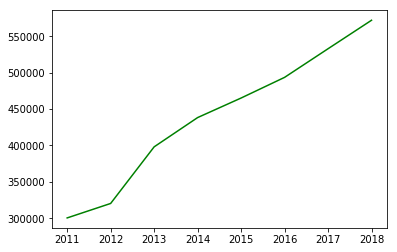

In [27]:
actualYears = np.arange(2011, 2019)

plt.plot(actualYears, medianLAHousing, color = 'g')
plt.show()

In [37]:
betweenYears = actualYears

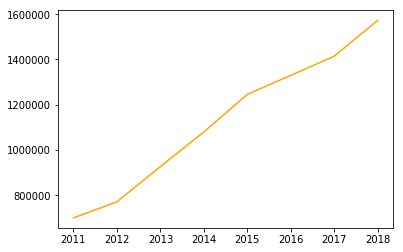

In [38]:
plt.plot(betweenYears, medianSFHousing, color='orange')
plt.show()

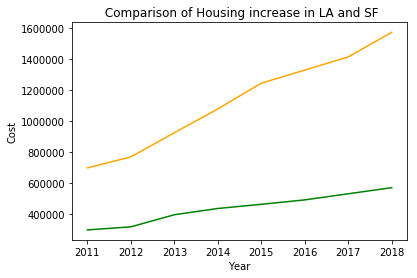

In [39]:
plt.plot(actualYears, medianLAHousing, color = 'g')
plt.plot(actualYears, medianSFHousing, color='orange')
plt.xlabel('Year')
plt.ylabel('Cost')
plt.title (' Comparison of Housing increase in LA and SF')
plt.show()

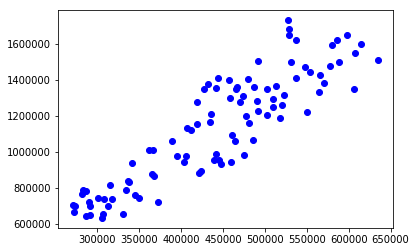

In [54]:
plt.scatter(medianHousing_df["Los Angeles"], medianHousing_df["San Francisco"], color = 'blue')
plt.show()

Text(0.5, 1.0, 'Average home price change per year')

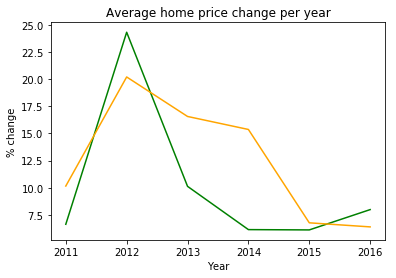

In [42]:
betweenYears= np.arange(2011,2017)
plt.plot(betweenYears, housingChangesLA, color="green")
plt.plot(betweenYears, housingChangesSF, color="orange")
plt.xlabel("Year")
plt.ylabel("% change")
plt.title("Average home price change per year")

Text(0.5, 1.0, 'Inflation per year')

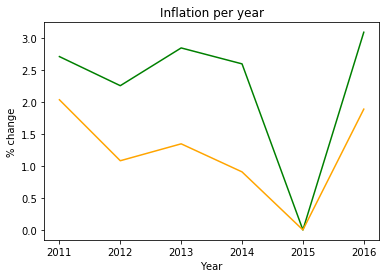

In [43]:
plt.plot(betweenYears, LAcpi, color="g")
plt.plot(betweenYears,SFcpi, color="orange")
plt.xlabel("Year")
plt.ylabel("% change")
plt.title("Inflation per year")

In [44]:
print(average_jobgroups2011)

[110822.3370790876, 68835.43144082343, 67541.1734157906, 142087.73186622624, 128502.71767032947, 54494.51881880746, 72951.59452103851, 110632.00975384632, nan, 80191.3445063291, 33216.92511293634, 79396.62902843599, 34290.48553744494, 55904.969472693054, 75559.4086096257, 39627.213419092746, 60507.45965670676, 62531.29145833337, 32952.74983576645, 54788.04409556314, 40377.66813513515, 40521.552776381934, 18491.15032786888, 9178.531606905706, 38473.69620689656]
